In [1]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('fighters.csv')
df.head()

,name,wins,looses,draws,ko_rate,stance,age,height,reach,country
0,Azizbek Abdumuxtar Abdugofurov,0,0,0,0%,Orthodox,Unknown,Unknown,Unknown,Uzbekistan
1,Franco Fernando Altamiranda,0,0,0,0%,Orthodox,Unknown,Unknown,Unknown,Argentina
2,Joaquin Saul Alvarez,0,0,0,0%,Orthodox,Unknown,Unknown,Unknown,"Venezuela, Bolivarian Republic of"
3,Saul Alvarez,54,1,2,63.2%,Orthodox,32,5.74 ft (1.75 m),70.47 inches (179 cm),Mexico
4,Sukru Altay,0,0,0,0%,Orthodox,38,Unknown,Unknown,Germany


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     2760 non-null   object
 1   wins     2760 non-null   int64 
 2   looses   2760 non-null   int64 
 3   draws    2760 non-null   int64 
 4   ko_rate  2760 non-null   object
 5   stance   2760 non-null   object
 6   age      2760 non-null   object
 7   height   2760 non-null   object
 8   reach    2760 non-null   object
 9   country  2760 non-null   object
dtypes: int64(3), object(7)
memory usage: 215.8+ KB


In [3]:
df.replace("Unknown", np.nan, inplace = True)
df.head()

,name,wins,looses,draws,ko_rate,stance,age,height,reach,country
0,Azizbek Abdumuxtar Abdugofurov,0,0,0,0%,Orthodox,NaN,NaN,NaN,Uzbekistan
1,Franco Fernando Altamiranda,0,0,0,0%,Orthodox,NaN,NaN,NaN,Argentina
2,Joaquin Saul Alvarez,0,0,0,0%,Orthodox,NaN,NaN,NaN,"Venezuela, Bolivarian Republic of"
3,Saul Alvarez,54,1,2,63.2%,Orthodox,32,5.74 ft (1.75 m),70.47 inches (179 cm),Mexico
4,Sukru Altay,0,0,0,0%,Orthodox,38,NaN,NaN,Germany


In [4]:
df.isnull().sum()

name          0
wins          0
looses        0
draws         0
ko_rate       0
stance      149
age         955
height     1693
reach      2177
country      20
dtype: int64

In [5]:
data = df.drop(['height', 'reach'], axis=1)
data 

,name,wins,looses,draws,ko_rate,stance,age,country
0,Azizbek Abdumuxtar Abdugofurov,0,0,0,0%,Orthodox,NaN,Uzbekistan
1,Franco Fernando Altamiranda,0,0,0,0%,Orthodox,NaN,Argentina
2,Joaquin Saul Alvarez,0,0,0,0%,Orthodox,NaN,"Venezuela, Bolivarian Republic of"
3,Saul Alvarez,54,1,2,63.2%,Orthodox,32,Mexico
4,Sukru Altay,0,0,0,0%,Orthodox,38,Germany
...,...,...,...,...,...,...,...,...
2755,Zaur Abdullaev,8,1,0,50%,Orthodox,28,NaN
2756,arthur abraham,47,6,0,56.6%,Orthodox,42,Germany
2757,victor abraham,24,15,0,20.5%,Orthodox,66,United States
2758,reiya abe,16,2,1,42.1%,Southpaw,29,Japan


In [6]:
data['age'] = data['age'].replace(np.nan, 0)
data.head()

,name,wins,looses,draws,ko_rate,stance,age,country
0,Azizbek Abdumuxtar Abdugofurov,0,0,0,0%,Orthodox,0,Uzbekistan
1,Franco Fernando Altamiranda,0,0,0,0%,Orthodox,0,Argentina
2,Joaquin Saul Alvarez,0,0,0,0%,Orthodox,0,"Venezuela, Bolivarian Republic of"
3,Saul Alvarez,54,1,2,63.2%,Orthodox,32,Mexico
4,Sukru Altay,0,0,0,0%,Orthodox,38,Germany


In [7]:
data['age'] = data['age'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     2760 non-null   object
 1   wins     2760 non-null   int64 
 2   looses   2760 non-null   int64 
 3   draws    2760 non-null   int64 
 4   ko_rate  2760 non-null   object
 5   stance   2611 non-null   object
 6   age      2760 non-null   int32 
 7   country  2740 non-null   object
dtypes: int32(1), int64(3), object(4)
memory usage: 161.8+ KB


In [8]:
data['age'].replace([0], data['age'].mean(), inplace=True)
data

,name,wins,looses,draws,ko_rate,stance,age,country
0,Azizbek Abdumuxtar Abdugofurov,0,0,0,0%,Orthodox,31.928261,Uzbekistan
1,Franco Fernando Altamiranda,0,0,0,0%,Orthodox,31.928261,Argentina
2,Joaquin Saul Alvarez,0,0,0,0%,Orthodox,31.928261,"Venezuela, Bolivarian Republic of"
3,Saul Alvarez,54,1,2,63.2%,Orthodox,32.000000,Mexico
4,Sukru Altay,0,0,0,0%,Orthodox,38.000000,Germany
...,...,...,...,...,...,...,...,...
2755,Zaur Abdullaev,8,1,0,50%,Orthodox,28.000000,NaN
2756,arthur abraham,47,6,0,56.6%,Orthodox,42.000000,Germany
2757,victor abraham,24,15,0,20.5%,Orthodox,66.000000,United States
2758,reiya abe,16,2,1,42.1%,Southpaw,29.000000,Japan


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     2760 non-null   object 
 1   wins     2760 non-null   int64  
 2   looses   2760 non-null   int64  
 3   draws    2760 non-null   int64  
 4   ko_rate  2760 non-null   object 
 5   stance   2611 non-null   object 
 6   age      2760 non-null   float64
 7   country  2740 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 172.6+ KB


In [10]:
data['age'] = data['age'].astype(int)
data

,name,wins,looses,draws,ko_rate,stance,age,country
0,Azizbek Abdumuxtar Abdugofurov,0,0,0,0%,Orthodox,31,Uzbekistan
1,Franco Fernando Altamiranda,0,0,0,0%,Orthodox,31,Argentina
2,Joaquin Saul Alvarez,0,0,0,0%,Orthodox,31,"Venezuela, Bolivarian Republic of"
3,Saul Alvarez,54,1,2,63.2%,Orthodox,32,Mexico
4,Sukru Altay,0,0,0,0%,Orthodox,38,Germany
...,...,...,...,...,...,...,...,...
2755,Zaur Abdullaev,8,1,0,50%,Orthodox,28,NaN
2756,arthur abraham,47,6,0,56.6%,Orthodox,42,Germany
2757,victor abraham,24,15,0,20.5%,Orthodox,66,United States
2758,reiya abe,16,2,1,42.1%,Southpaw,29,Japan


In [11]:
data['ko_rate'] = data['ko_rate'].apply(lambda value: str(value).replace('%', ' '))
data

,name,wins,looses,draws,ko_rate,stance,age,country
0,Azizbek Abdumuxtar Abdugofurov,0,0,0,0,Orthodox,31,Uzbekistan
1,Franco Fernando Altamiranda,0,0,0,0,Orthodox,31,Argentina
2,Joaquin Saul Alvarez,0,0,0,0,Orthodox,31,"Venezuela, Bolivarian Republic of"
3,Saul Alvarez,54,1,2,63.2,Orthodox,32,Mexico
4,Sukru Altay,0,0,0,0,Orthodox,38,Germany
...,...,...,...,...,...,...,...,...
2755,Zaur Abdullaev,8,1,0,50,Orthodox,28,NaN
2756,arthur abraham,47,6,0,56.6,Orthodox,42,Germany
2757,victor abraham,24,15,0,20.5,Orthodox,66,United States
2758,reiya abe,16,2,1,42.1,Southpaw,29,Japan


In [12]:
data = data.dropna()
data

,name,wins,looses,draws,ko_rate,stance,age,country
0,Azizbek Abdumuxtar Abdugofurov,0,0,0,0,Orthodox,31,Uzbekistan
1,Franco Fernando Altamiranda,0,0,0,0,Orthodox,31,Argentina
2,Joaquin Saul Alvarez,0,0,0,0,Orthodox,31,"Venezuela, Bolivarian Republic of"
3,Saul Alvarez,54,1,2,63.2,Orthodox,32,Mexico
4,Sukru Altay,0,0,0,0,Orthodox,38,Germany
...,...,...,...,...,...,...,...,...
2754,georgie abrams,48,10,3,14.8,Orthodox,103,United States
2756,arthur abraham,47,6,0,56.6,Orthodox,42,Germany
2757,victor abraham,24,15,0,20.5,Orthodox,66,United States
2758,reiya abe,16,2,1,42.1,Southpaw,29,Japan


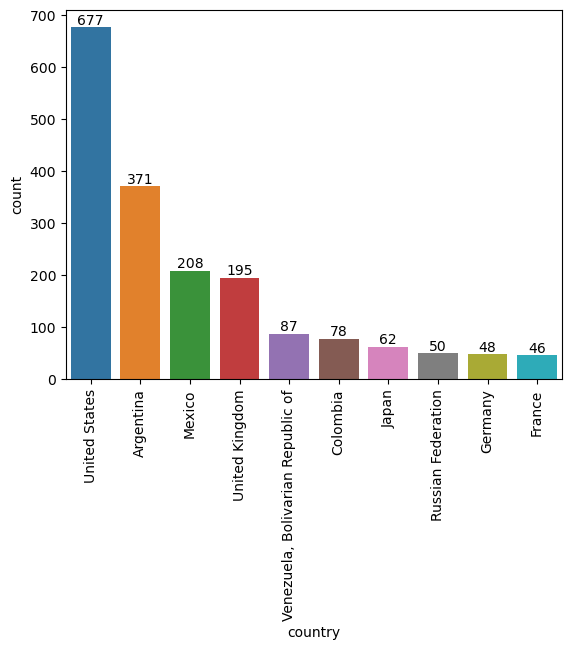

In [14]:
ax = sns.countplot(x = data['country'], order = data['country'].value_counts().head(10).index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)
plt.show()

Berdasarkan visualisasi diatas dapat disimpulkan bahwa AMERIKA SERIKAT memiliki jumlah atlet terbanyak yaitu sebanyak 667 atlet

In [15]:
datas = (
    data.groupby(["country"])[["wins", "looses", "draws"]]
    .sum()
    .sort_values(["wins", "looses", "draws"], ascending=False)
    .reset_index()
)

In [16]:
datas['Total'] = datas.wins + datas.looses + datas.draws
datas.head()

,country,wins,looses,draws,Total
0,United States,23919,5703,1353,30975
1,United Kingdom,5119,2043,210,7372
2,Mexico,3178,623,93,3894
3,Argentina,1812,442,134,2388
4,Australia,1047,194,44,1285


In [20]:
top_nocs = datas.head(10)
# Bar plot
fig = px.bar(
    top_nocs.sort_values(["wins", "draws", "looses"], ascending=True),
    y="country",
    x=["wins", "draws", "looses"],
    orientation="h",
    color_discrete_sequence=["#5D3891", "#F99417", "#F55050"],
    title="10 Country with Top Performance",
).update_layout(xaxis={"title": "Performance Count"}, legend={"title": "Performance"})
# to add the text of total medals for each noc
fig.add_trace(
    go.Scatter(
        y=top_nocs.sort_values(["wins", "draws", "looses"], ascending=True).country,
        x=top_nocs.sort_values(["wins", "draws", "looses"], ascending=True).Total,
        text=top_nocs.sort_values(["wins", "draws", "looses"], ascending=True).Total,
        mode="text",
        textposition="bottom right",
        textfont=dict(
            size=13,
        ),
        showlegend=False,
    )
)
fig.show()

Berdasarkan visualisasi diatas didapatkan informasi bahwa AMERIKA SERIKAT merupakan negara dengan performa teratas dimana negara ini mengikuti sebanyak 30975 pertandingan dan menang sebanyak 23.919 kali , seri sebanyak 1353 kali , dan kalah sebanyak 5703. 

In [21]:
dataz = (
    data.groupby(["name"])[["wins", "looses", "draws"]]
    .sum()
    .sort_values(["wins", "looses", "draws"], ascending=False)
    .reset_index()
)

In [22]:
dataz['Total'] = dataz.wins + dataz.looses + dataz.draws
dataz.head()

,name,wins,looses,draws,Total
0,harry greb,262,17,18,297
1,jack britton,239,57,46,342
2,willie pep,229,11,1,241
3,maxie rosenbloom,223,43,30,296
4,freddie miller,211,31,10,252


In [24]:
import plotly.graph_objects as go
top_nocs = dataz.head(10)
# Bar plot
fig = px.bar(
    top_nocs.sort_values(["wins", "draws", "looses"], ascending=True),
    y="name",
    x=["wins", "draws", "looses"],
    orientation="h",
    color_discrete_sequence=["#5D3891", "#F99417", "#F55050"],
    title="10 Athletes with Top Performance",
).update_layout(xaxis={"title": "Performance Count"}, legend={"title": "Performance"})
# to add the text of total medals for each noc
fig.add_trace(
    go.Scatter(
        y=top_nocs.sort_values(["wins", "draws", "looses"], ascending=True).name,
        x=top_nocs.sort_values(["wins", "draws", "looses"], ascending=True).Total,
        text=top_nocs.sort_values(["wins", "draws", "looses"], ascending=True).Total,
        mode="text",
        textposition="bottom right",
        textfont=dict(
            size=13,
        ),
        showlegend=False,
    )
)
fig.show()

Berdasarkan visualisasi diatas didapatkan informasi bahwa HARRY GREB merupakan atlet dengan performa teratas dimana dari 297 pertandingan yang ia ikuti terdapat 262 kali kemenangan, 18 kali seri, dan 17 kali kalah.

In [27]:
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features
from plotly.offline import init_notebook_mode, iplot

def Plot_PieChart(str1, str_yield,title):
    
    yield_crop = data.groupby(str1)[str_yield].sum().to_frame().reset_index()
    
    colors = None
    trace0 = go.Pie(labels=yield_crop[str1], values=yield_crop[str_yield],
                    domain= {'x': [0, .30]}, marker=dict(colors=colors))
    
    layout = dict(title= title, 
                  font=dict(family='Courier New, monospace', size=15, color='#7f7f7f'),
                  height=400, width=1000,)
    fig = dict(data=[trace0], layout=layout)
    iplot(fig)

In [28]:
str1 = 'stance'
str_yield = 'wins'
title = 'Persentase Total Stance terhadap Total Wins '
Plot_PieChart(str1, str_yield, title)

Berdasarkan visualisasi diatas didapatkan informasi bahwa dari total kemenangan yaitu 50833 kali, kuda-kuda ORTHODOX menyumbang 87.5% kemenangan dimana kuda-kuda ORTHODOX digunakan oleh 2416 atlet, sedangkan kuda-kuda SOUTHPAW hanya 12.5% dimana kuda-kuda ini digunakan oleh 183 atlet.

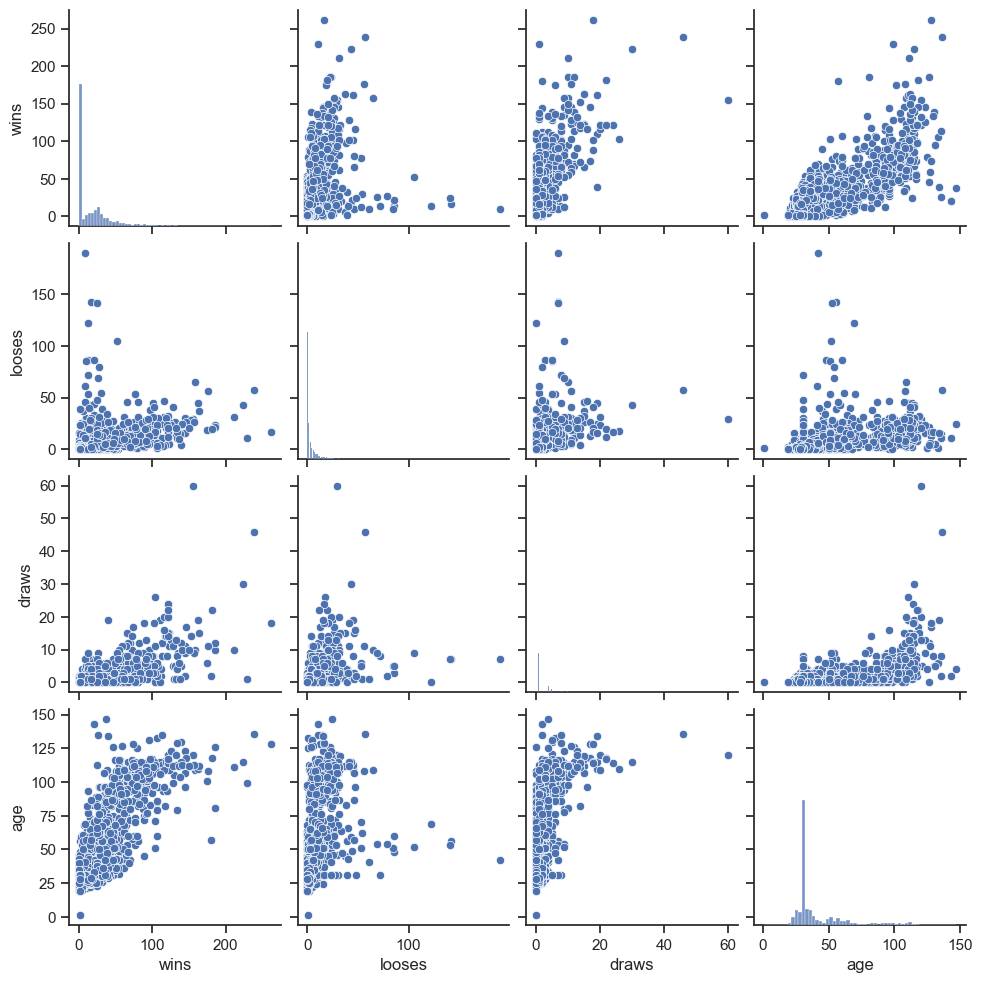

In [33]:
sns.set(style="ticks", color_codes=True)    
df= data
g = sns.pairplot(df)
plt.show()

Berdasarkan visualisasi diatas didapatkan bahwa tidak ada fitur yang memiliki korelasi yang kuat dengan fitur lainnya artinya tidak terdapat hubungan sebab akibat antar fitur yang ada di data FIGTHERS.